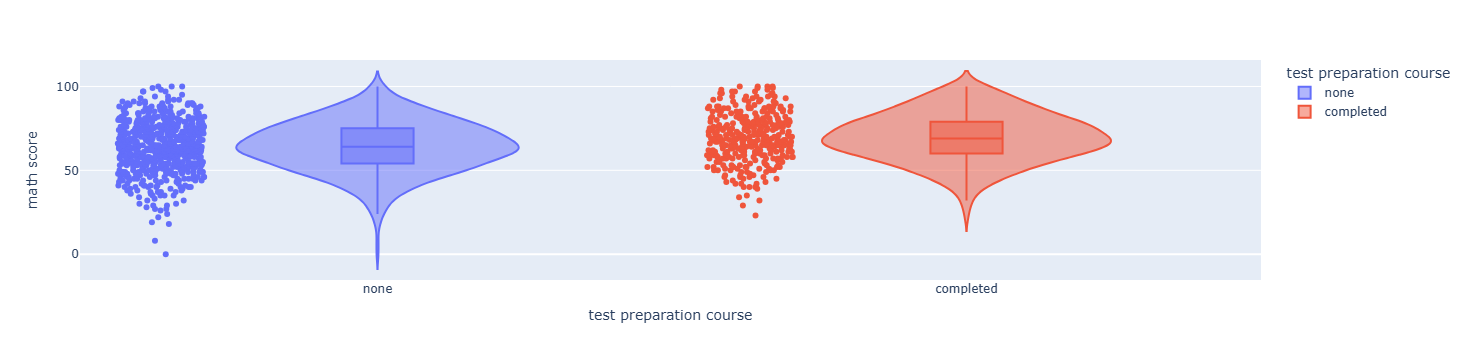

p-value: 1.5359134607147415e-08
有意差あり
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 151
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 14
[LightGBM] [Info] Start training from score 66.496250
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

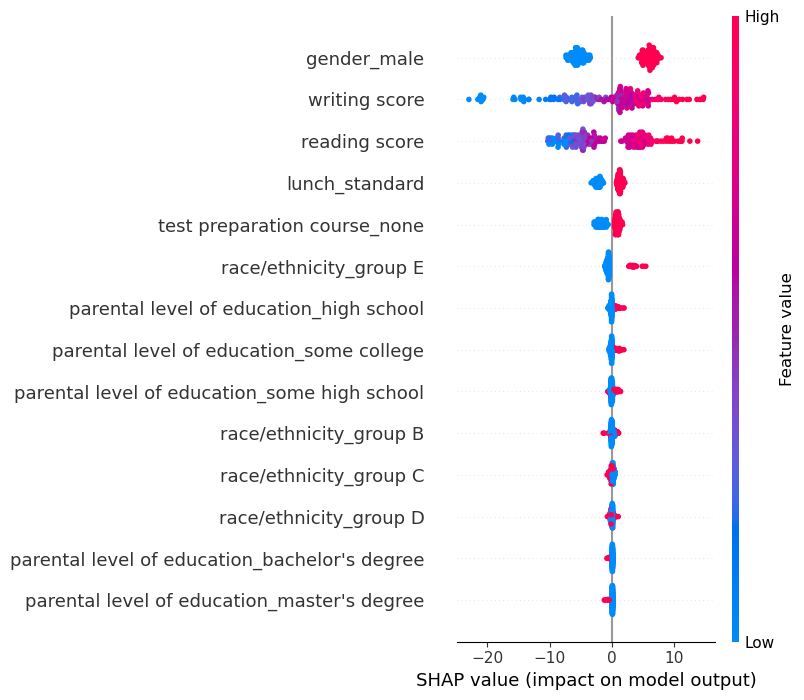

In [4]:
import pandas as pd
from scipy import stats
import plotly.express as px
import lightgbm as lgb
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# データ読み込み
df = pd.read_csv('StudentsPerformance.csv')

# --- EDA ---
fig = px.violin(df, y="math score", x="test preparation course",
                color="test preparation course", box=True, points="all")
fig.show()

# t検定
prepared = df[df['test preparation course'] == 'completed']['math score']
not_prepared = df[df['test preparation course'] == 'none']['math score']
t_stat, p_value = stats.ttest_ind(prepared, not_prepared)

print(f"p-value: {p_value}")
if p_value < 0.05:
    print("有意差あり")
else:
    print("有意差なし")

# --- 機械学習 ---
df_ml = pd.get_dummies(df, drop_first=True)
X = df_ml.drop(['math score'], axis=1)
y = df_ml['math score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = lgb.LGBMRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# 特徴量重要度 & SHAP
print("Feature Importance:")
for feat, imp in zip(X.columns, model.feature_importances_):
    print(f"{feat}: {imp}")

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)